In [251]:
import pandas as pd 
import numpy as np 

# Annual freshwater withdrawals, total (% of total freshwater withdrawal)

In [252]:
import matplotlib.pyplot as plt

api_er = pd.read_csv('data/API_ER.H2O.FWDM.ZS_DS2_en_csv_v2_13862.csv', skiprows=4, sep=',')
api_er

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.677217,10.818819,10.806661,9.976818,10.195597,10.057182,10.364225,NaN,NaN,NaN
2,Afghanistan,AFG,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.998385,0.998385,0.998385,0.998385,0.998385,0.998385,0.998385,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.802177,25.812396,25.975716,24.845523,24.735578,24.782898,24.722233,NaN,NaN,NaN
4,Angola,AGO,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,45.267781,45.267781,45.267781,45.267781,45.267781,45.267781,45.267781,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.433380,7.433380,7.433380,7.433380,7.433380,7.433380,7.433380,NaN,NaN,NaN
263,South Africa,ZAF,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.989282,19.842520,20.072239,15.098237,16.666667,16.207378,17.435217,NaN,NaN,NaN
264,Zambia,ZMB,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.447837,18.447837,18.447837,18.447837,18.447837,18.447837,18.447837,NaN,NaN,NaN


In [253]:

kgz = api_er[api_er['Country Code'] == 'KGZ']
years = [str(year) for year in range(1960, 2024)]
kgz_series = kgz[years].T
kgz_series.columns = ['Domestic Water Use (% of Total)']
kgz_series.index.name = 'Year'
kgz_series = kgz_series.dropna()
kgz_series

,Domestic Water Use (% of Total)
Year,
1994,2.984335
1995,3.016046
1996,3.047758
1997,3.079469
1998,3.111180
1999,3.142892
2000,3.174603
2001,3.122913
2002,3.067419


<function matplotlib.pyplot.show(close=None, block=None)>

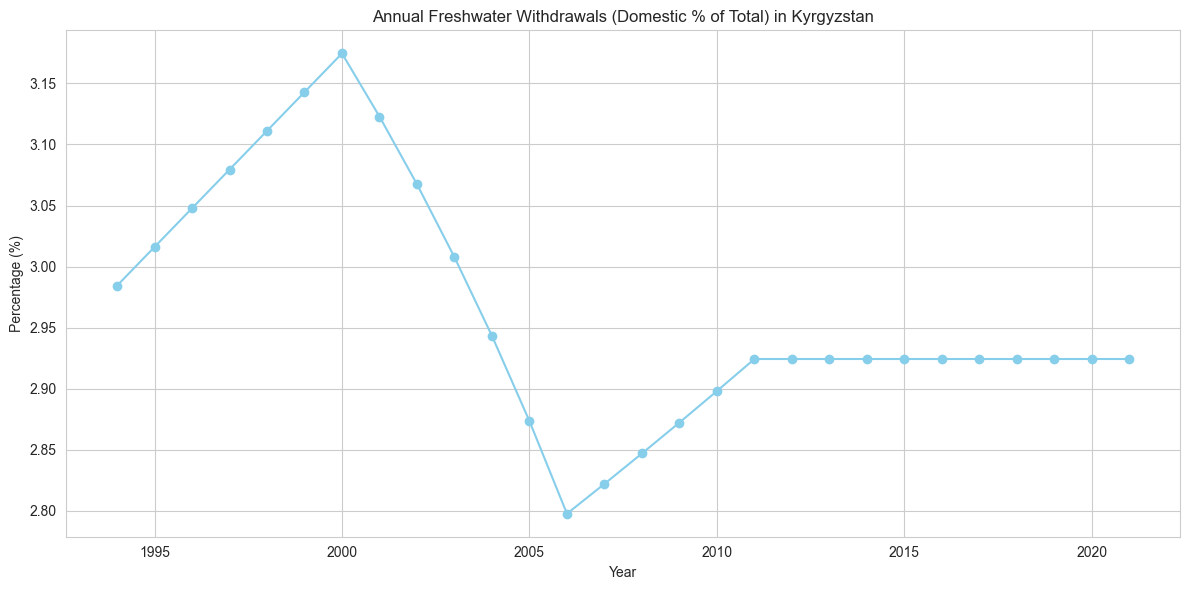

In [254]:
kgz_series.index = kgz_series.index.astype(int)

plt.figure(figsize = (12, 6))
plt.plot(kgz_series.index, kgz_series['Domestic Water Use (% of Total)'], marker = 'o', color = 'skyblue')
plt.title('Annual Freshwater Withdrawals (Domestic % of Total) in Kyrgyzstan')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show

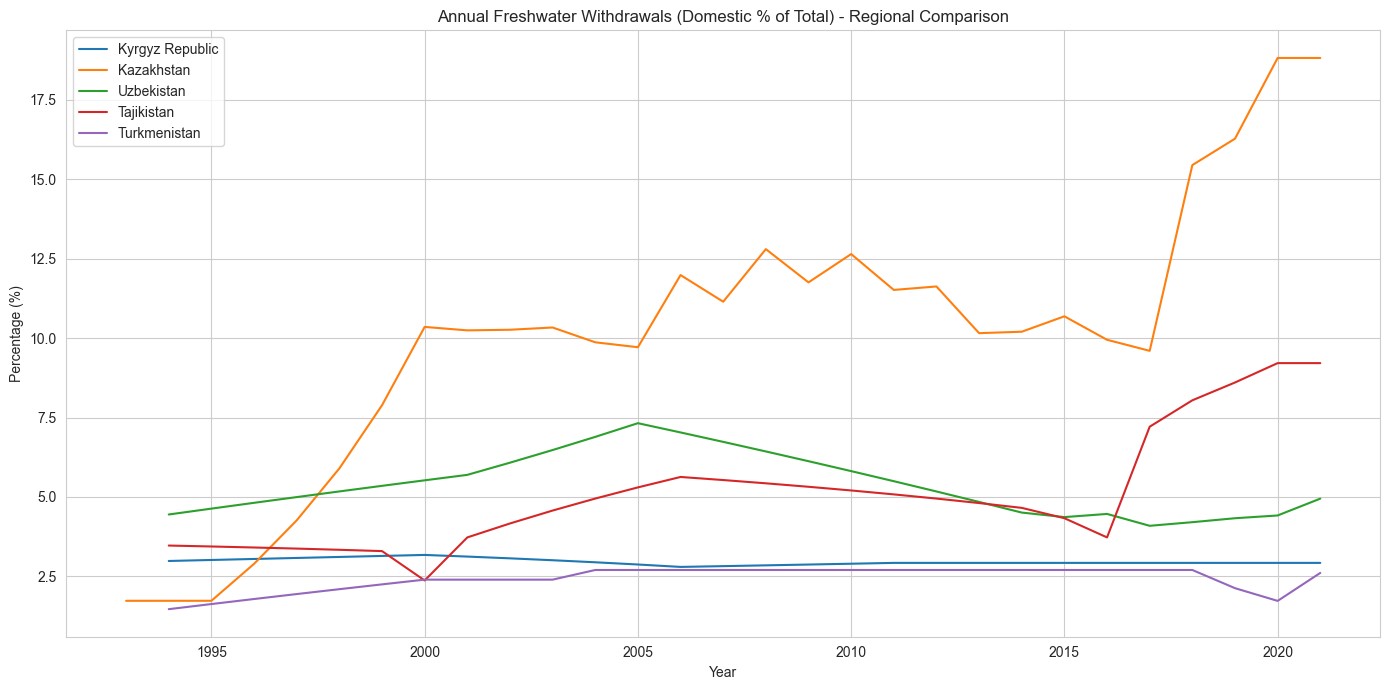

In [255]:
countries = [
    'Kyrgyz Republic',
    'Kazakhstan',
    'Uzbekistan',
    'Tajikistan',
    'Turkmenistan'
]

years = [str(year) for year in range(1960, 2024)]

filtered_data = api_er[api_er['Country Name'].isin(countries)]

plt.figure(figsize = (14, 7))
for country in countries:
    country_data = filtered_data[filtered_data['Country Name'] == country]
    series = country_data[years].T
    series.columns = [country]
    series.index = series.index.astype(int)
    plt.plot(series.index, series[country], label = country)
    
plt.title('Annual Freshwater Withdrawals (Domestic % of Total) - Regional Comparison')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Water use efficiency in agriculture (% of total freshwater withdrawal) and industrial (% of total freshwater withdrawal)

In [256]:
import seaborn as sns

aqua = pd.read_csv('data/AQUASTAT Dissemination System.csv')
kgz_aqua = aqua[aqua['Area'] == 'Kyrgyzstan']
kgz_aqua

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
282,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kyrgyzstan,2019,30.061817,%,I,False
283,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kyrgyzstan,2020,30.061817,%,I,False
284,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kyrgyzstan,2021,30.061817,%,I,False
867,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,Kyrgyzstan,2019,6.141333,US$/m3,E,False
868,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,Kyrgyzstan,2020,5.527355,US$/m3,E,False
869,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,Kyrgyzstan,2021,5.417102,US$/m3,E,False
1458,Water use,Pressure on water resources,SDG 6.4.1. Irrigated Agriculture Water Use Eff...,Kyrgyzstan,2019,0.110137,US$/m3,E,False
1459,Water use,Pressure on water resources,SDG 6.4.1. Irrigated Agriculture Water Use Eff...,Kyrgyzstan,2020,0.117399,US$/m3,E,False
1460,Water use,Pressure on water resources,SDG 6.4.1. Irrigated Agriculture Water Use Eff...,Kyrgyzstan,2021,0.126548,US$/m3,E,False
2052,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,Kyrgyzstan,2019,18.489407,US$/m3,E,False


In [257]:
pivot_df = kgz_aqua.pivot(index='Variable', columns='Year', values='Value')
units = kgz_aqua[['Variable', 'Unit']].drop_duplicates().set_index('Variable')
kqz_aqua = pivot_df.join(units)
kqz_aqua

,2019,2020,2021,Unit
Variable,,,,
Agricultural water withdrawal as % of total renewable water resources,30.061817,30.061817,30.061817,%
SDG 6.4.1. Industrial Water Use Efficiency,6.141333,5.527355,5.417102,US$/m3
SDG 6.4.1. Irrigated Agriculture Water Use Efficiency,0.110137,0.117399,0.126548,US$/m3
SDG 6.4.1. Services Water Use Efficiency,18.489407,17.296391,18.029019,US$/m3
SDG 6.4.1. Water Use Efficiency,0.912152,0.857065,0.882133,US$/m3
SDG 6.4.2. Water Stress,50.038956,50.038956,50.038956,%


In [258]:
import matplotlib.pyplot as plt

variable = 'Agricultural water withdrawal as % of total renewable water resources'

filtered = aqua[(aqua['Variable'] == variable) & (aqua['Year'].between(2019, 2021))]

filtered = filtered[filtered['Area'].isin(['Kyrgyzstan', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Turkmenistan'])]

top_countries = filtered.sort_values('Value', ascending=False).head(10)
filtered

,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
273,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kazakhstan,2019,14.565077,%,E,False
274,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kazakhstan,2020,14.205332,%,E,False
275,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kazakhstan,2021,14.205332,%,E,False
282,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kyrgyzstan,2019,30.061817,%,I,False
283,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kyrgyzstan,2020,30.061817,%,I,False
284,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Kyrgyzstan,2021,30.061817,%,I,False
525,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Tajikistan,2019,33.674121,%,I,False
526,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Tajikistan,2020,33.674121,%,I,False
527,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Tajikistan,2021,33.674121,%,I,False
543,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Turkmenistan,2019,66.035938,%,E,False


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\3175313245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Value', y='Area', palette='Blues_d')


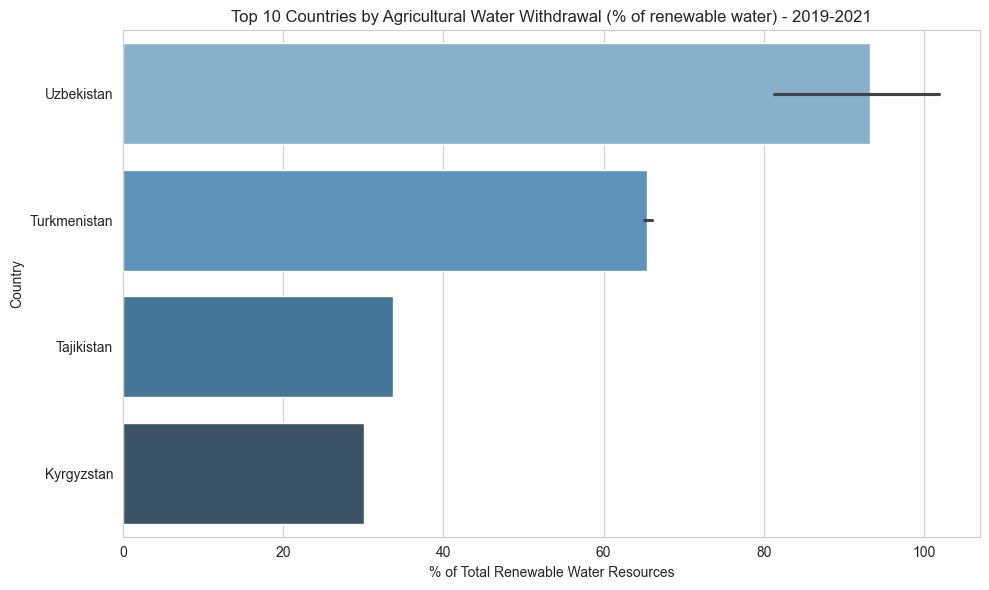

In [259]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Value', y='Area', palette='Blues_d')

plt.title('Top 10 Countries by Agricultural Water Withdrawal (% of renewable water) - 2019-2021')
plt.xlabel('% of Total Renewable Water Resources')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\190384093.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Value', y='Area', palette='viridis')


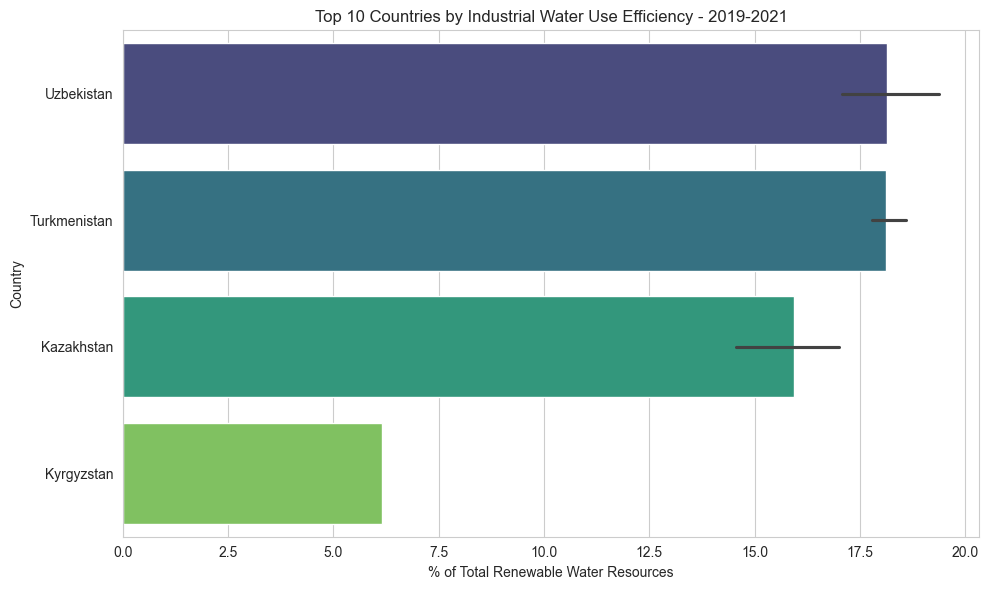

In [260]:
variable = 'SDG 6.4.1. Industrial Water Use Efficiency'
filtered = aqua[(aqua['Variable'] == variable) & (aqua['Year'].between(2019, 2021))]

filtered = filtered[filtered['Area'].isin(['Kyrgyzstan', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Turkmenistan'])]

top_countries = filtered.sort_values('Value', ascending=False).head(10)
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Value', y='Area', palette='viridis')

plt.title('Top 10 Countries by Industrial Water Use Efficiency - 2019-2021')
plt.xlabel('% of Total Renewable Water Resources')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\3333961575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Value', y='Area', palette='coolwarm', orient='h')


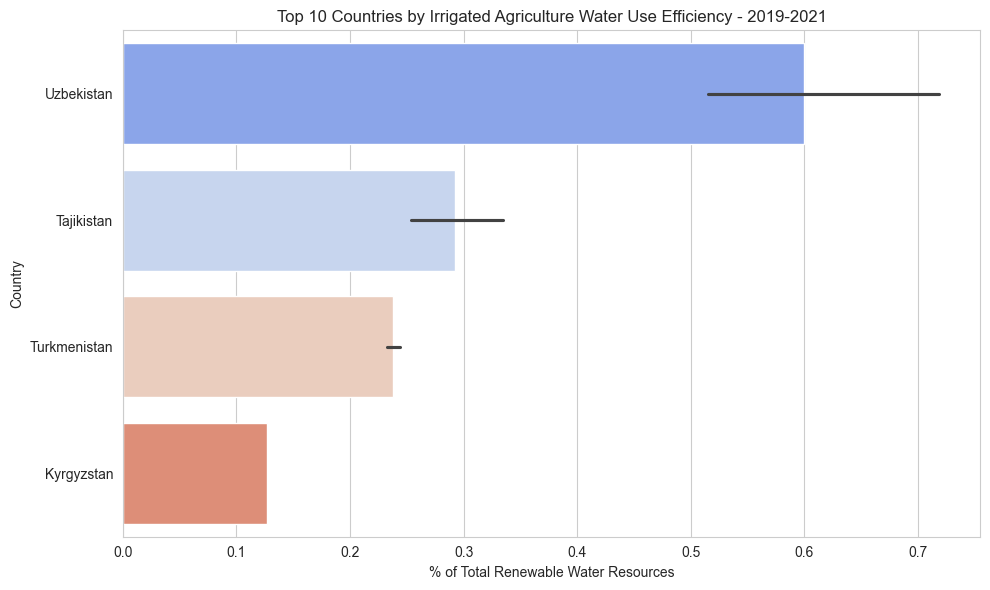

In [261]:
variable = 'SDG 6.4.1. Irrigated Agriculture Water Use Efficiency'
filtered = aqua[(aqua['Variable'] == variable) & (aqua['Year'].between(2019, 2021))]

filtered = filtered[filtered['Area'].isin(['Kyrgyzstan', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Turkmenistan'])]

top_countries = filtered.sort_values('Value', ascending=False).head(10)
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
# Создаём горизонтальный график
sns.barplot(data=top_countries, x='Value', y='Area', palette='coolwarm', orient='h')

plt.title('Top 10 Countries by Irrigated Agriculture Water Use Efficiency - 2019-2021')
plt.xlabel('% of Total Renewable Water Resources')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


# Water using in any other sectors (in million m^3)

In [262]:
resources = pd.read_json('https://stat.gov.kg/en/opendata/category/3216/json')
resources

,data,title,units
0,"{'pk': 135840, 'priority': 1, 'title_en': 'Wat...",Protection and rational use of water resources,million m3
1,"{'pk': 135841, 'priority': 2, 'title_en': 'Fro...",Protection and rational use of water resources,million m3
2,"{'pk': 135842, 'priority': 3, 'title_en': 'Wat...",Protection and rational use of water resources,million m3
3,"{'pk': 135843, 'priority': 4, 'title_en': 'For...",Protection and rational use of water resources,million m3
4,"{'pk': 135844, 'priority': 5, 'title_en': 'For...",Protection and rational use of water resources,million m3
5,"{'pk': 135845, 'priority': 6, 'title_en': 'Was...",Protection and rational use of water resources,million m3
6,"{'pk': 135846, 'priority': 7, 'title_en': 'Pur...",Protection and rational use of water resources,million m3
7,"{'pk': 135847, 'priority': 8, 'title_en': 'Was...",Protection and rational use of water resources,million m3


In [263]:
data_expanded = pd.json_normalize(resources['data'])
rows = []

for _, row in data_expanded.iterrows():
    indicator = row['title_en']
    for value in row['values']:
        year = value['key']
        val = value['value']
        rows.append({'Indicator': indicator, 'Year': year, 'Value': val})

df = pd.DataFrame(rows)
pivot_df = df.pivot(index='Indicator', columns='Year', values='Value')
pivot_df = pivot_df.sort_index(axis=1)
pivot_df

Year,2019,2020,2021,2022,2023
Indicator,,,,,
For irrigation and agricultural water supply,4920.7,4942.0,4986.9,5515.6,5697.0
For production needs,84.3,82.5,80.2,79.1,67.6
From underground water,254.8,249.8,252.9,258.4,271.0
Purified according to standards water,94.3,118.4,129.1,128.2,128.2
Waste water,99.3,123.4,133.1,132.2,132.2
Waste water discharfe (without treatment or not enough treated),1.9,1.9,1.7,1.7,1.7
Water abstraction from natural water sources,8068.7,8017.9,7999.5,8741.9,8872.5
Water consumption,5211.1,5237.5,5310.0,5844.0,6028.0


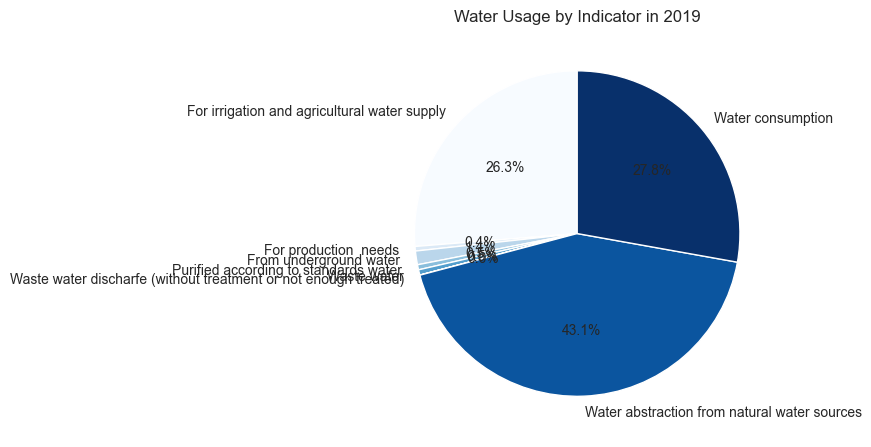

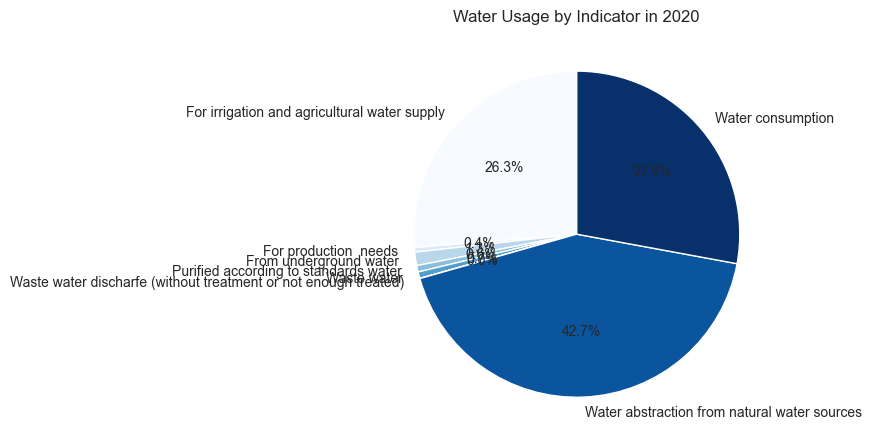

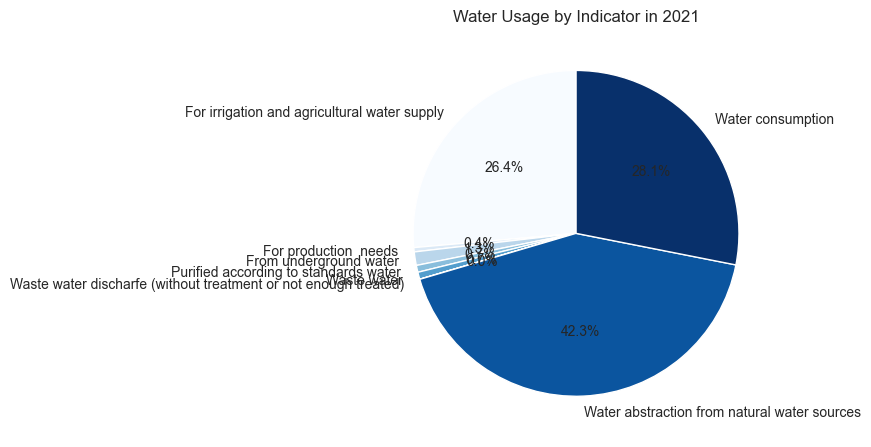

In [264]:
df_filtered = pivot_df.loc[:, 2019:2021]
for year in df_filtered.columns:
    plt.figure(figsize=(8, 8))
    df_filtered[year].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Blues')
    plt.title(f'Water Usage by Indicator in {year}')
    plt.ylabel('')  
    plt.tight_layout()
    plt.show()


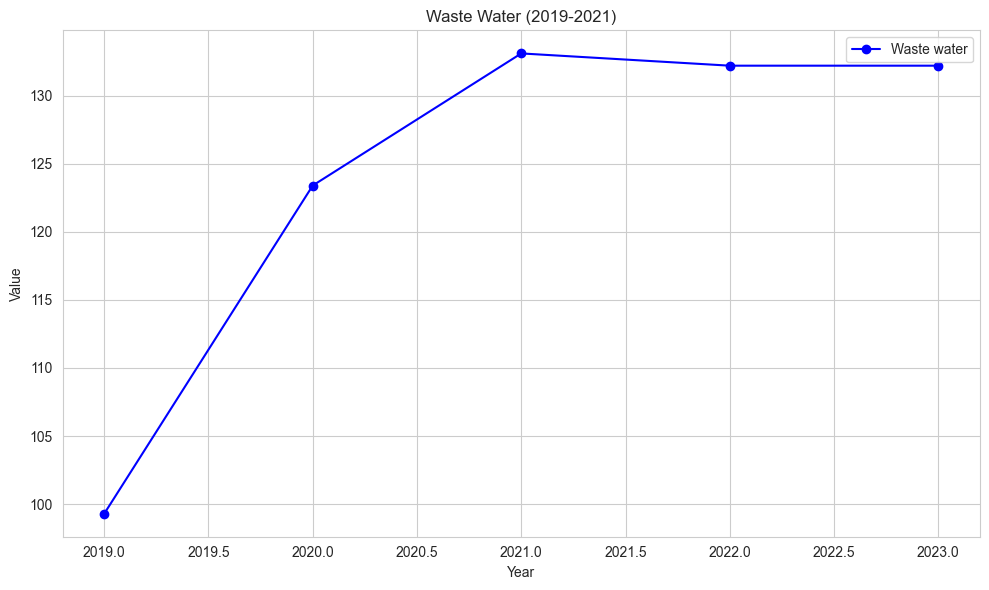

In [265]:
waste_water_data = pivot_df.loc['Waste water', 2019:2023]

plt.figure(figsize=(10, 6))
plt.plot(waste_water_data.index, waste_water_data.values, marker='o', color='b', label='Waste water')

plt.title('Waste Water (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


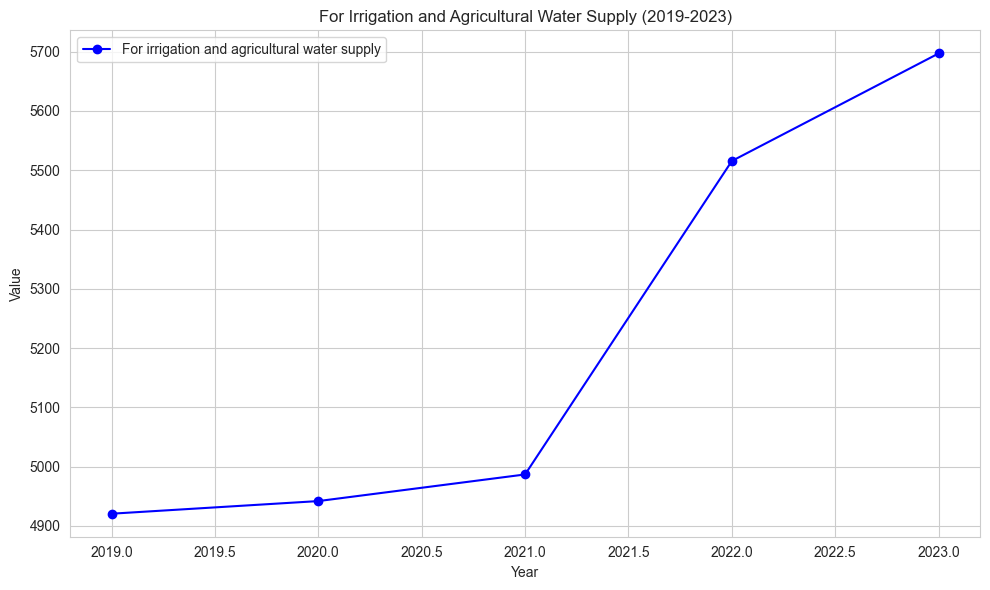

In [266]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.columns, pivot_df.loc['For irrigation and agricultural water supply'], marker='o', color='b', label='For irrigation and agricultural water supply')

plt.title('For Irrigation and Agricultural Water Supply (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


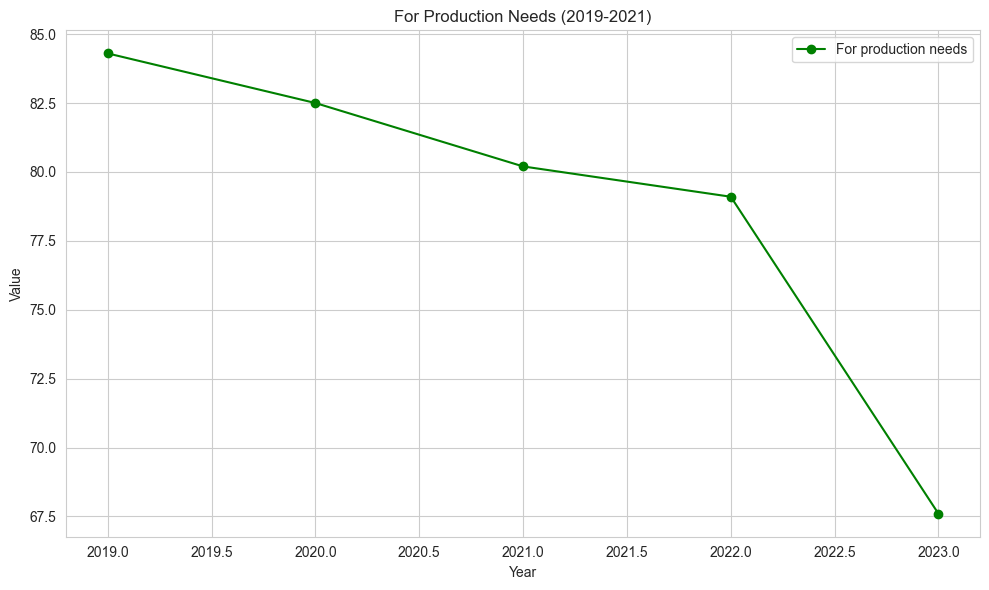

In [267]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.columns, pivot_df.loc['For production  needs'], marker='o', color='g', label='For production needs')

plt.title('For Production Needs (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

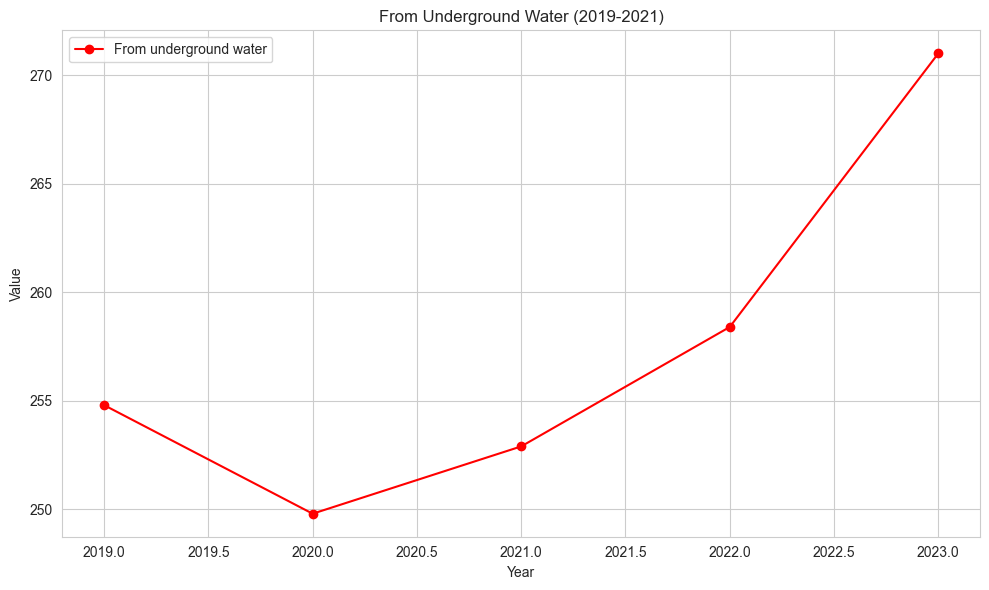

In [268]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.columns, pivot_df.loc['From underground water'], marker='o', color='r', label='From underground water')

plt.title('From Underground Water (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


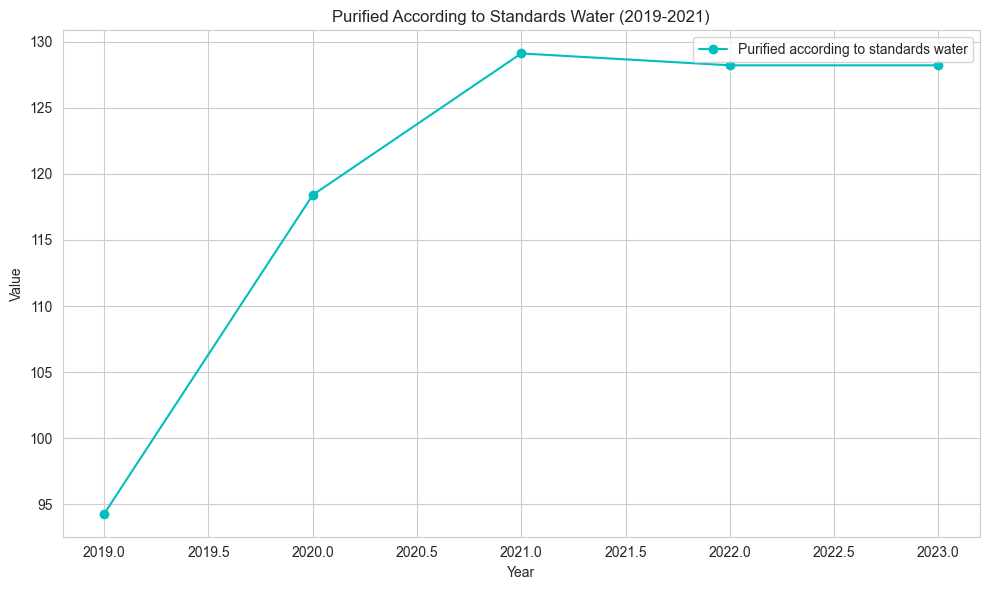

In [269]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.columns, pivot_df.loc['Purified according to standards water'], marker='o', color='c', label='Purified according to standards water')

plt.title('Purified According to Standards Water (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


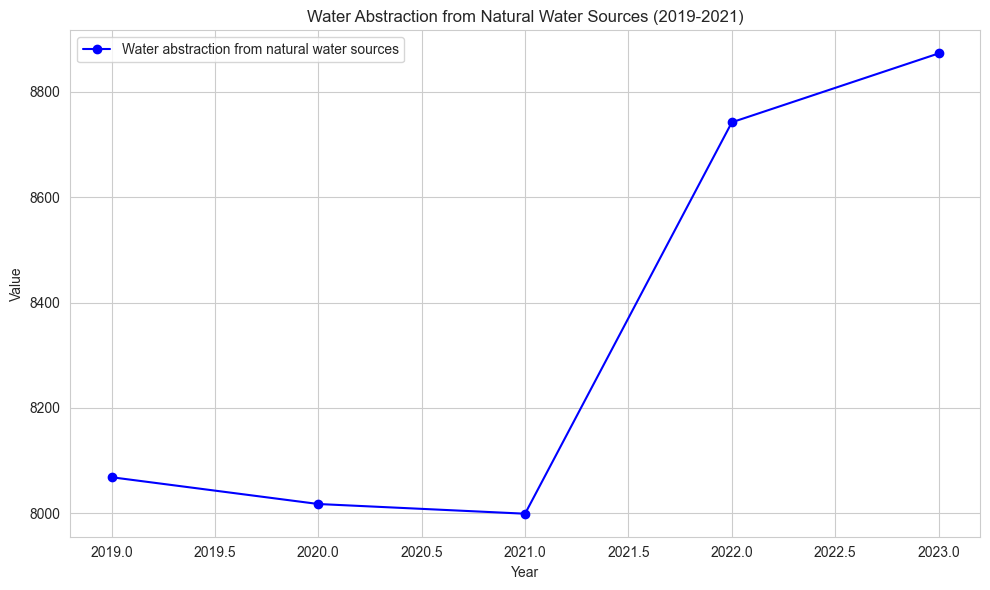

In [270]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.columns, pivot_df.loc['Water abstraction from natural water sources'], marker='o', color='b', label='Water abstraction from natural water sources')

plt.title('Water Abstraction from Natural Water Sources (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

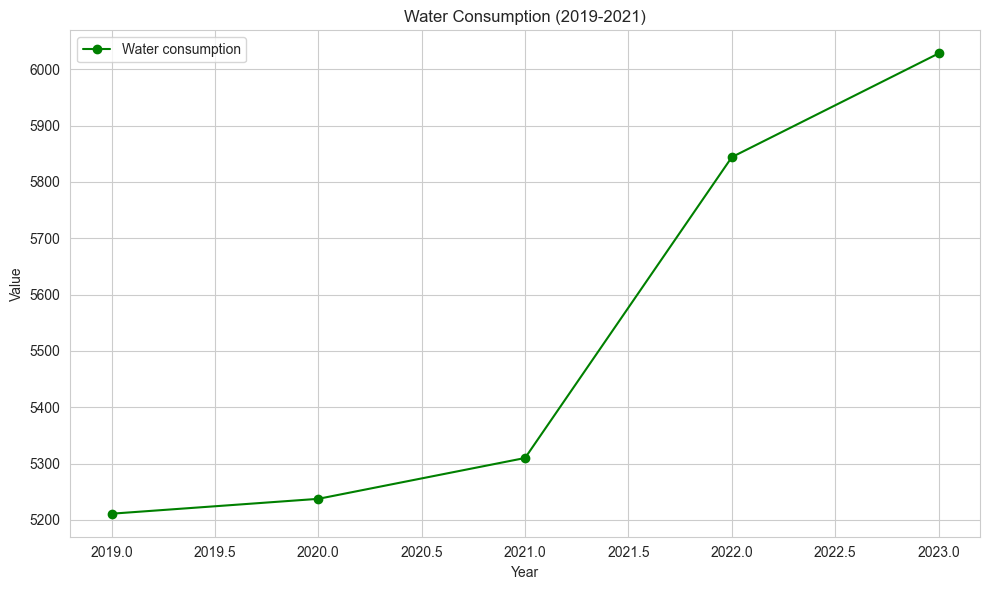

In [271]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.columns, pivot_df.loc['Water consumption'], marker='o', color='g', label='Water consumption')

plt.title('Water Consumption (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Map of rivers of Kyrgyzstan 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\3816012528.py:9: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  rivers_kg = rivers[rivers.intersects(country.unary_union)]


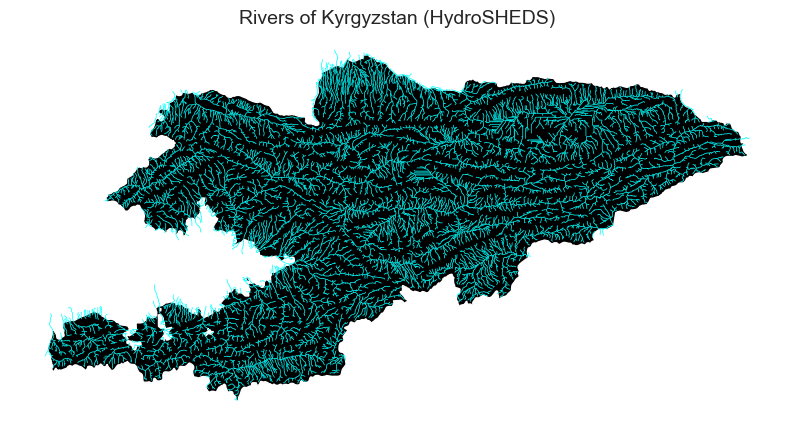

In [272]:
import geopandas as gpd
import matplotlib.pyplot as plt

country = gpd.read_file("data/gadm/gadm41_KGZ_0.shp")
rivers = gpd.read_file("data/hydrorivers/HydroRIVERS_v10_as.shp")

country = country.to_crs(epsg=4326)
rivers = rivers.to_crs(country.crs)
rivers_kg = rivers[rivers.intersects(country.unary_union)]

fig, ax = plt.subplots(figsize=(10, 10))
country.plot(ax=ax, color='black', edgecolor='white')
rivers_kg.plot(ax=ax, color='aqua', linewidth=0.5)
plt.title("Rivers of Kyrgyzstan (HydroSHEDS)", fontsize=14)
plt.axis("off")
plt.show()


# Raifall data and its visualization

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\3789958301.py:4: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/kgz-rainfall-adm2-full.csv')


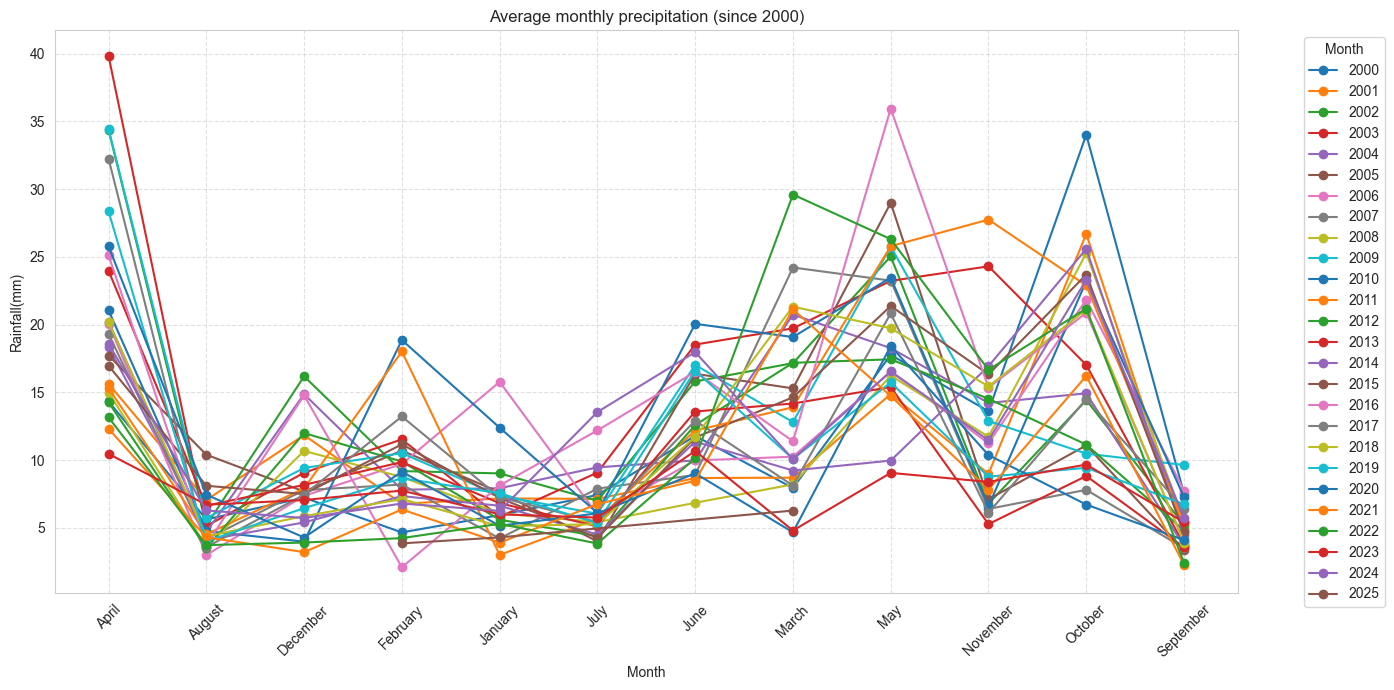

In [273]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/kgz-rainfall-adm2-full.csv')

df_clean = df[1:].copy()

df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['rfh'] = pd.to_numeric(df_clean['rfh'], errors='coerce')

month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df_clean['Month'] = df_clean['date'].dt.month.map(month_map)
df_clean['Year'] = df_clean['date'].dt.year

df_analysis = df_clean[['date', 'Month', 'Year', 'rfh']].copy()
df_analysis.rename(columns={'rfh': 'Rainfall(mm)'}, inplace=True)

df_filtered = df_analysis[df_analysis['Year'] >= 2000]

monthly_by_year = df_filtered.groupby(['Year', 'Month'])['Rainfall(mm)'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_by_year['Month'] = pd.Categorical(monthly_by_year['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 7))
for year in sorted(monthly_by_year['Year'].unique()):
    year_data = monthly_by_year[monthly_by_year['Year'] == year]
    plt.plot(year_data['Month'], year_data['Rainfall(mm)'], marker='o', label=str(year))

plt.title('Average monthly precipitation (since 2000)')
plt.xlabel('Month')
plt.ylabel('Rainfall(mm)')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


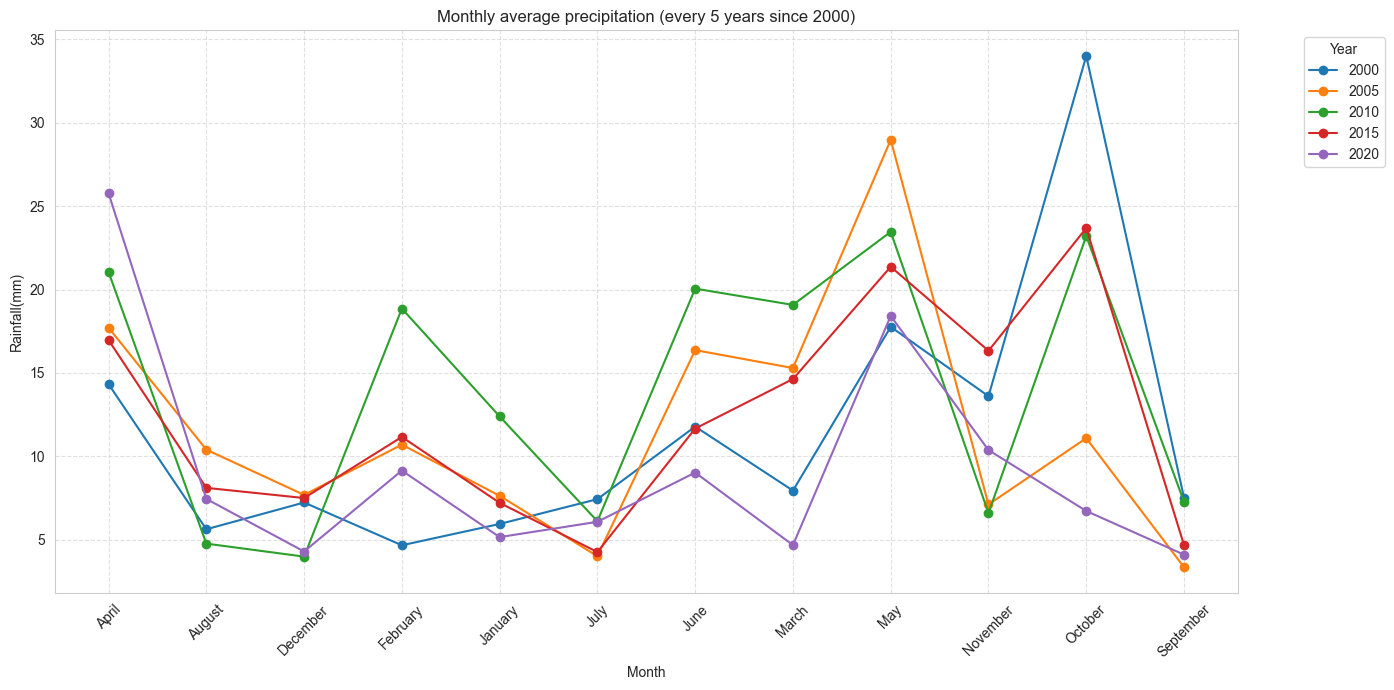

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

selected_years = [2000, 2005, 2010, 2015, 2020]
df_filtered = df_analysis[df_analysis['Year'].isin(selected_years)]

monthly_by_year = df_filtered.groupby(['Year', 'Month'])['Rainfall(mm)'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_by_year['Month'] = pd.Categorical(monthly_by_year['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(14, 7))
for year in selected_years:
    year_data = monthly_by_year[monthly_by_year['Year'] == year]
    plt.plot(year_data['Month'], year_data['Rainfall(mm)'], marker='o', label=str(year))

plt.title('Monthly average precipitation (every 5 years since 2000)')
plt.xlabel('Month')
plt.ylabel('Rainfall(mm)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

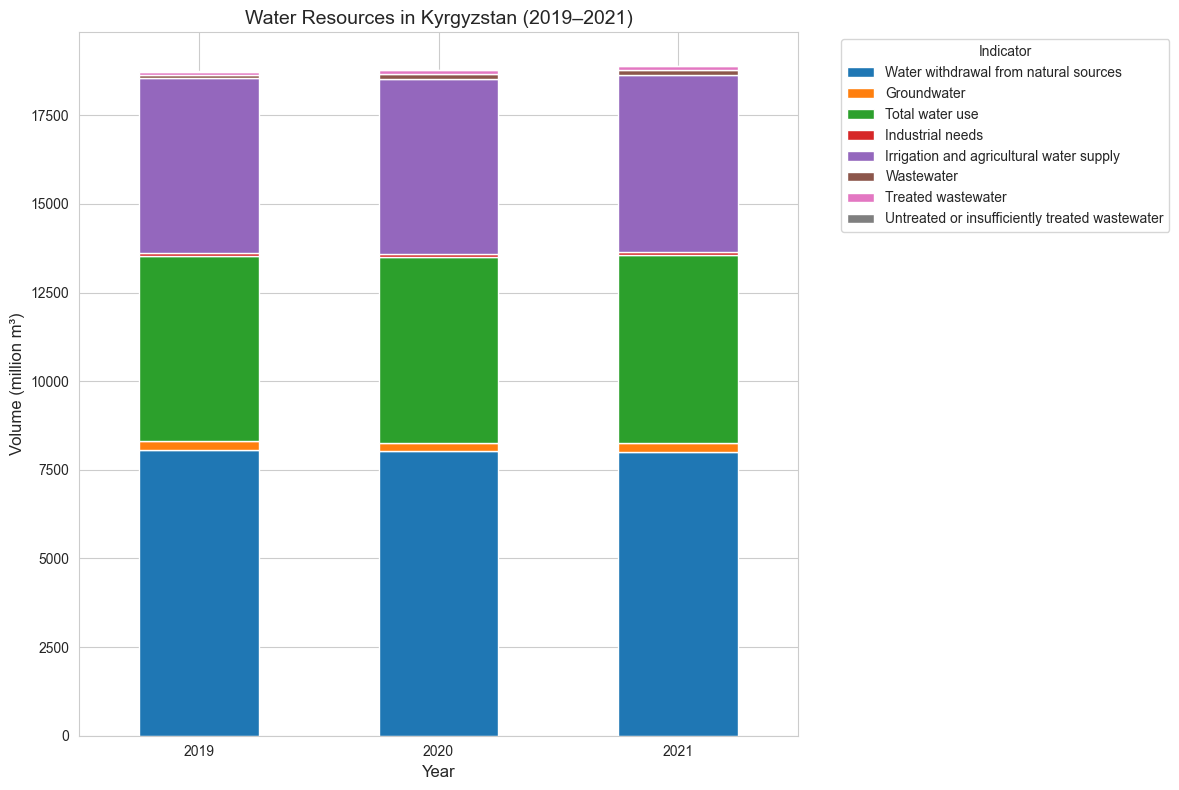

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Indicator': [
        'Water withdrawal from natural sources',
        'Groundwater',
        'Total water use',
        'Industrial needs',
        'Irrigation and agricultural water supply',
        'Wastewater',
        'Treated wastewater',
        'Untreated or insufficiently treated wastewater'
    ],
    '2019': [8068.7, 254.8, 5211.1, 84.3, 4920.7, 99.3, 94.3, 1.9],
    '2020': [8017.9, 249.8, 5237.5, 82.5, 4942, 123.4, 118.4, 1.9],
    '2021': [7999.5, 252.9, 5310, 80.2, 4986.9, 133.1, 129.1, 1.7]
}

df = pd.DataFrame(data)
df.set_index('Indicator', inplace=True)

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
df.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Water Resources in Kyrgyzstan (2019–2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (million m³)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


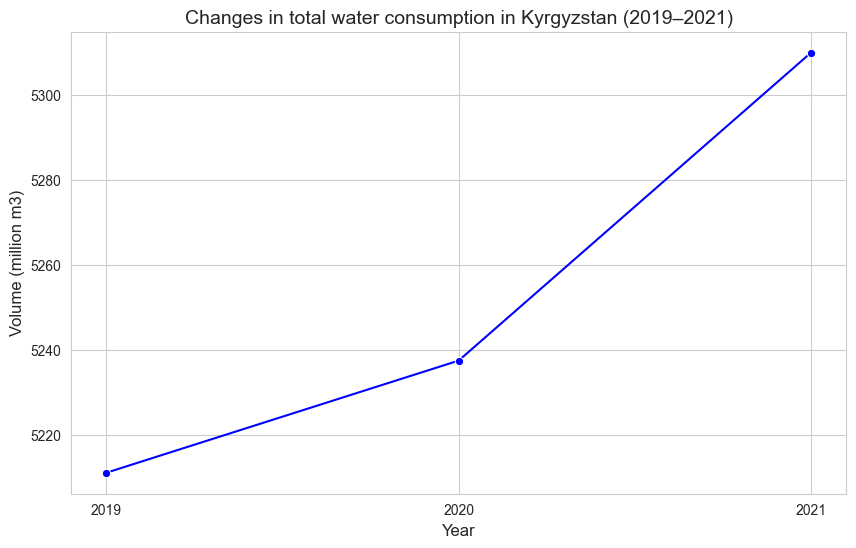

In [276]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.columns, y=df.loc['Total water use'], marker='o', color='b')
plt.title('Changes in total water consumption in Kyrgyzstan (2019–2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume (million m3)', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23268\2067729177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['2021'], palette='Blues_d')


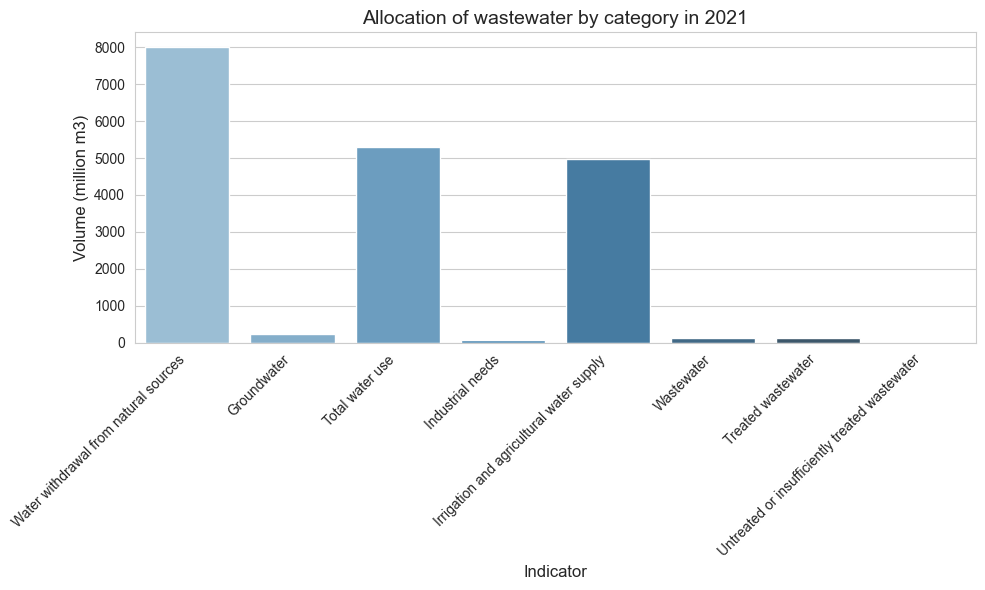

In [277]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df['2021'], palette='Blues_d')
plt.title('Allocation of wastewater by category in 2021', fontsize=14)
plt.xlabel('Indicator', fontsize=12)
plt.ylabel('Volume (million m3)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
